<img src="../../images/qiskit-heading.gif" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="500 px" align="left">

# Ploting Data in Qiskit

In [3]:
from qiskit.tools.visualization import plot_histogram, plot_state, plot_bloch_vector

In [4]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute, Aer

## Plot histogram

To visualize the data from a quatnum circuit run on a real device of `qasm_simulator` we have made a simple function 

`
plot_histogram(data, number_to_keep=None, legend=None, options=None)
`

As an example we make a 2 qubit Bell state

In [30]:
q = QuantumRegister(2)
c = ClassicalRegister(2)

# quantum circuit to make a GHZ state 
bell =QuantumCircuit(q,c)
bell.h(q[0])
bell.cx(q[0],q[1])

meas = QuantumCircuit(q,c)
meas.measure(q, c)

# execute the quantum circuit 
backend = Aer.get_backend('qasm_simulator') # the device to run on
circ = bell+meas
result = execute(circ, backend, shots=1000).result()
counts  = result.get_counts(circ)
print(counts)

{'00': 485, '11': 515}


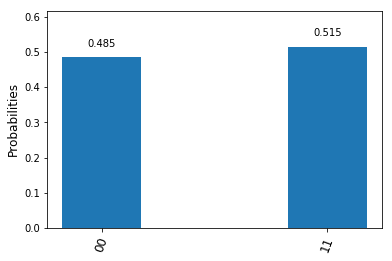

In [31]:
plot_histogram(counts)

## Plot State

In many situations you want to see the state of a quantum computer. This could be for debugging. Here we assume you have this state (either from simulation or state tomography) and the goal is to visualize the quantum state. This requires exponential resources, so we advise to only view the state of small quantum systems. The function is

`
plot_state(quantum_state, method='city', filename=None)
`

A quantum state is either a state matrix $\rho$ (Hermitian matrix) or statevector $|\psi\rangle$ (complex vector). The state matrix is related to the statevector by 

$$\rho = |\psi\rangle\langle \psi|.$$

And is more general as it can represent mixed states (positive sum of statevectors) 

$$\rho = \sum_k p_k |\psi_k\rangle\langle \psi_k |.$$

The methods supported are:
- `'city'`: The standard view for quantum states where the real and imag parts of the state matrix are plotted like a city
- `'qsphere'`: The Qiskit unique view of a quantum state where the amp and phase of the state vector are plotted in a spherical ball. The amp is the thickness of the arrow and the phase is the color. For mixed states it will show different `'qsphere'` for each component. 
- `'paulivec'`: The representation of the state matrix using Pauli operators as the basis $\rho=\sum_{q=0}^{d^2-1}p_jP_j/d$
- `'hinton'`: Same as `'city'` but with the size of the element represent the vaule of the matrix element.  
- `'bloch'`: The projection of the quantum state onto the single qubit space and plotting on a bloch sphere.  

In [35]:
# execute the quantum circuit 
backend = Aer.get_backend('statevector_simulator') # the device to run on
result = execute(bell, backend).result()
psi  = result.get_statevector(bell)

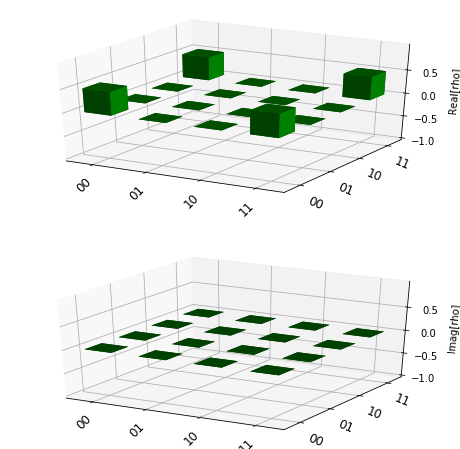

In [36]:
plot_state(psi, method='city')

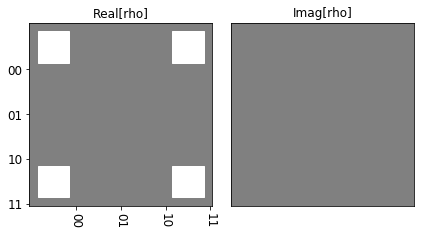

In [37]:
plot_state(psi, method='hinton')

The 0th eigenvalue = 1.0


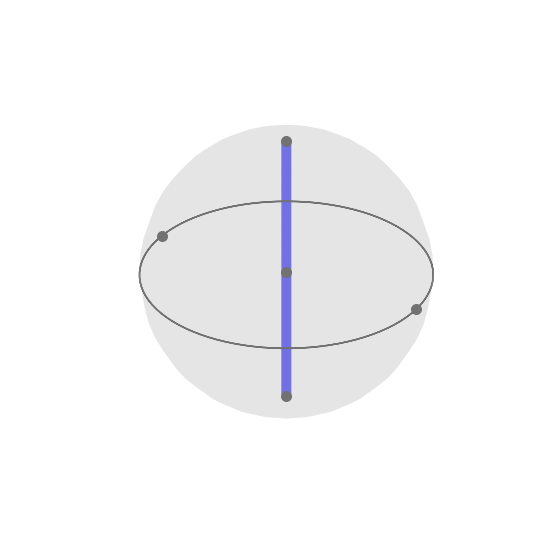

In [38]:
plot_state(psi, method='qsphere')

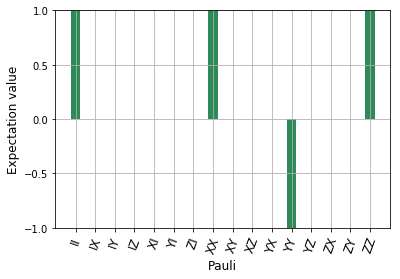

In [39]:
plot_state(psi, method='paulivec')

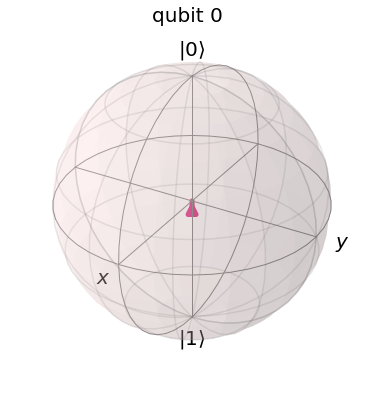

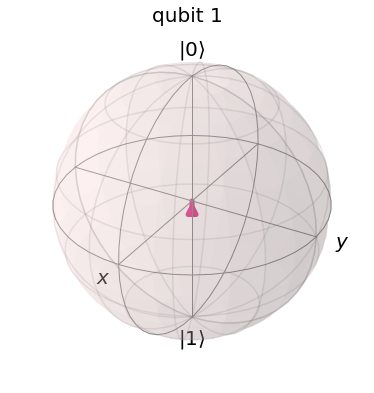

In [40]:
plot_state(psi, method='bloch')

Here we see that there is no information about the quantum state in the single qubit space as all vectors are zero. 

## Plot Bloch Vector

A standard way of plotting a quantum system is using the Bloch vector. This only works for a single qubit and takes as inputs the Bloch vector. 

The Bloch vecotr is defined as $[x = \mathrm{Tr}[X \rho], y = \mathrm{Tr}[Y \rho], z = \mathrm{Tr}[Z \rho]]$, where $X$, $Y$, and $Z$ are the Pauli operators for a single qubit and $\rho$ is the state matrix.


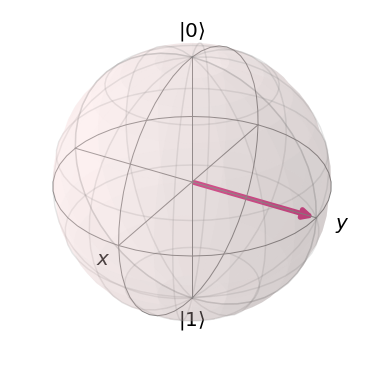

In [41]:
plot_bloch_vector([0,1,0])